## Dimensionless Analysis of Transition Boiling Using Machine Learning

We will begin this study by organising our data into a pandas dataframe. The data was collected from the EMT lab for the purpose of this analysis. Once this is done we will move on to creating a dimensionless dataframe.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#Preparing the data for processing

#creating dataframe for copper with nano coating
#superheat temperature
CuPdT=np.array([72.40704, 71.10017, 68.97078, 66.61751, 64.08479, 60.74023, 54.43071, 45.65994, 37.83159, 31.28086, 25.83957, 21.364, 17.69793, 14.88374, 12.66149, 10.85478, 9.529446, 8.609713, 7.790826, 7.306428, 6.665404, 6.195496, 5.902143, 5.638786])
#heat flux
Cuq=np.array([6.6269, 8.4672, 10.02, 11.579, 13.376, 17.513, 28.068, 41.091, 46.072, 47.085, 42.897, 36.914, 30.965, 23.28, 17.433, 12.823, 9.447, 7.042, 5.352, 4.182, 3.344, 2.773, 2.258, 1.862])

CuP={'dT': CuPdT.tolist(),
     'q': Cuq.tolist()}

dfCuP=pd.DataFrame(CuP, columns=['q','dT'])


#creating dataframe for copper with nano coating
#superheat temperature
CuNdT=np.array([59.62617107, 55.64625709, 49.25617399, 42.25567956, 35.95063683, 30.64195807, 26.30468767, 22.5830269, 19.63947259, 17.20142809, 15.30240145, 13.47199512, 12.01536863, 10.81286203, 9.706640891, 8.889856847, 8.168731217, 7.618664801, 7.172672996, 6.663560068, 6.205403771, 5.866599029, 5.594729712, 5.317489446, 5.099367698])
#heat flux
CuNq=np.array([6.032, 20.009, 44.71, 66.505, 77.331, 78.535, 74.93, 66.786, 56.826, 47.898, 39.346, 32.231, 26.624, 22.275, 18.516, 15.945, 13.782, 11.645, 10.174, 8.325, 7.372, 6.3, 5.36, 4.951, 4.219])

CuN={'dT': CuNdT.tolist(),
     'q': CuNq.tolist()}
    
dfCuN=pd.DataFrame(CuN, columns=['q','dT'])

#creating dataframe for plane Aluminum
#superheat temperature
AlPdT=np.array([59.26537, 55.48475, 51.17239, 46.5946, 41.85994, 37.19834, 32.95427, 28.94159, 25.18407, 21.88755, 19.0159, 16.50307, 14.50592, 12.65392, 11.1548, 9.814904, 8.751415, 7.868639, 7.121047, 6.542312, 6.023217])
#Heat flux
Alq=np.array([22.20092, 38.55384, 45.88544, 47.17718, 45.38837, 42.6716, 39.1973, 36.12405, 33.18834, 30.1666, 26.93744, 22.94232, 19.48176, 16.54108, 14.03877, 12.18961, 10.30799, 8.830249, 7.522769, 6.447961, 5.512758])

AlP={'dT': AlPdT.tolist(),
     'q': Alq.tolist()}

dfAlP=pd.DataFrame(AlP, columns=['q','dT'])

#creating dataframe for Aluminum with nano coating
#superheat temperature
AlNdT=np.array([64.5774882, 56.7100587, 48.6706631, 41.5980008, 35.5826658, 30.5508967, 26.6204239, 23.4450393, 20.8737279, 18.749954, 16.951414, 15.4714771, 14.2563868, 13.2151452, 12.3045772, 11.5336639, 10.8288597, 10.2194144, 9.68749447, 9.2075748, 8.79153423, 8.40384187])
#heat flux
AlNq=np.array([20.9809233, 57.6925765, 71.5818239, 67.54756, 59.9970482, 50.5416674, 41.0311739, 33.9732047, 27.6191982, 22.7323589, 18.8425034, 15.6918866, 13.0517787, 11.1406004, 9.656973, 8.10700753, 7.32281073, 6.13342328, 5.41011967, 4.85147497, 4.29891155, 3.8000111])

AlN={'dT': AlNdT.tolist(),
     'q': AlNq.tolist()}

dfAlN=pd.DataFrame(AlN, columns=['q','dT'])

Since we have added all our measured data from the lab into a data frame, we will proceed to add the material properties of each substrate.

In [3]:
# assigning k values

dfCuP['k']=[490 for n in range(len(dfCuP))]
dfCuN['k']=[490 for n in range(len(dfCuN))]
dfAlP['k']=[147 for n in range(len(dfAlP))]
dfAlN['k']=[147 for n in range(len(dfAlN))]

# assigning n1 values

dfCuP['n1']=[0.01128 for n in range(len(dfCuP))]
dfCuN['n1']=[0.11039 for n in range(len(dfCuN))]
dfAlP['n1']=[0.3376 for n in range(len(dfAlP))]
dfAlN['n1']=[0.02647 for n in range(len(dfAlN))]

# assigning n2 values

dfCuP['n2']=[2.984 for n in range(len(dfCuP))]
dfCuN['n2']=[2.2767 for n in range(len(dfCuN))]
dfAlP['n2']=[1.570 for n in range(len(dfAlP))]
dfAlN['n2']=[2.3429 for n in range(len(dfAlN))]

# assigning theta values

dfCuP['theta']=[47 for n in range(len(dfCuP))]
dfCuN['theta']=[7 for n in range(len(dfCuN))]
dfAlP['theta']=[45 for n in range(len(dfAlP))]
dfAlN['theta']=[8 for n in range(len(dfAlN))]

# assigning n1xdT^n2

dfCuP['q_']=[dfCuP['n1'][n]*dfCuP['dT'][n]**dfCuP['n2'][n] for n in range(len(dfCuP))]
dfCuN['q_']=[dfCuN['n1'][n]*dfCuN['dT'][n]**dfCuN['n2'][n] for n in range(len(dfCuN))]
dfAlP['q_']=[dfAlP['n1'][n]*dfAlP['dT'][n]**dfAlP['n2'][n] for n in range(len(dfAlP))]
dfAlN['q_']=[dfAlN['n1'][n]*dfAlN['dT'][n]**dfAlN['n2'][n] for n in range(len(dfAlN))]

# assigning gamma = q/n1xdT^n2

dfCuP['alpha']=[dfCuP['q'][n]/dfCuP['q_'][n] for n in range(len(dfCuP))]
dfCuN['alpha']=[dfCuN['q'][n]/dfCuN['q_'][n] for n in range(len(dfCuN))]
dfAlP['alpha']=[dfAlP['q'][n]/dfAlP['q_'][n] for n in range(len(dfAlP))]
dfAlN['alpha']=[dfAlN['q'][n]/dfAlN['q_'][n] for n in range(len(dfAlN))]

#combining all the data to one dataframe

Data=[dfCuP, dfCuN, dfAlP, dfAlN]
DF=pd.concat(Data, ignore_index=True, )
#DF=DF.sort_values(by='dT')
DF

,q,dT,k,n1,n2,theta,q_,alpha
0,6.626900,72.407040,490,0.01128,2.9840,47,3998.480557,0.001657
1,8.467200,71.100170,490,0.01128,2.9840,47,3786.963217,0.002236
2,10.020000,68.970780,490,0.01128,2.9840,47,3458.484790,0.002897
3,11.579000,66.617510,490,0.01128,2.9840,47,3118.149062,0.003713
4,13.376000,64.084790,490,0.01128,2.9840,47,2777.575781,0.004816
...,...,...,...,...,...,...,...,...
87,6.133423,10.219414,147,0.02647,2.3429,8,6.133920,0.999919
88,5.410120,9.687494,147,0.02647,2.3429,8,5.411888,0.999673
89,4.851475,9.207575,147,0.02647,2.3429,8,4.804518,1.009773
90,4.298912,8.791534,147,0.02647,2.3429,8,4.311249,0.997138


Our dataframe is complete. From this dataframe, we will create a dimensionless dataframe. This will be used to study the transition boiling.

In [4]:
#k and theta have already been evaluated
#let us determine Q_s, Ja_s, Pr_l

mhu = 2.78*10**(-4)
h = 2257
sig = 0.0589
g_en = 9.8
rho_l = 958
rho_v = 0.597
c_p = 4.22
Pr = 1.72

DF['Q_s']=[10*(DF['q'][n]/(mhu*h))*np.sqrt(sig/(g_en*(rho_l-rho_v))) for n in range(len(DF))]

DF['Ja_s']=[100*c_p*DF['dT'][n]/h for n in range(len(DF))]

DF['Pr_l']=[1.72 for n in range(len(DF))]
            
DF

,q,dT,k,n1,n2,theta,q_,alpha,Q_s,Ja_s,Pr_l
0,6.626900,72.407040,490,0.01128,2.9840,47,3998.480557,0.001657,0.264625,13.538224,1.72
1,8.467200,71.100170,490,0.01128,2.9840,47,3786.963217,0.002236,0.338112,13.293873,1.72
2,10.020000,68.970780,490,0.01128,2.9840,47,3458.484790,0.002897,0.400118,12.895733,1.72
3,11.579000,66.617510,490,0.01128,2.9840,47,3118.149062,0.003713,0.462372,12.455733,1.72
4,13.376000,64.084790,490,0.01128,2.9840,47,2777.575781,0.004816,0.534130,11.982180,1.72
...,...,...,...,...,...,...,...,...,...,...,...
87,6.133423,10.219414,147,0.02647,2.3429,8,6.133920,0.999919,0.244920,1.910763,1.72
88,5.410120,9.687494,147,0.02647,2.3429,8,5.411888,0.999673,0.216037,1.811308,1.72
89,4.851475,9.207575,147,0.02647,2.3429,8,4.804518,1.009773,0.193729,1.721576,1.72
90,4.298912,8.791534,147,0.02647,2.3429,8,4.311249,0.997138,0.171664,1.643787,1.72


We now have our complete data set with dimensionless data. Let us now process these dimensionless data using a genetic algorithm in the low superheat region. The goal here is to obtain the constants of an equation of the form 
$$Q_s = \hat{n}_1Ja_s^{\hat{n}_2}Pr_l^{-\hat{n}_5}$$
$$\implies lnQ_s = ln(\hat{n}_1) + \hat{n}_2ln(Ja_s) - n_5ln(Pr_l)$$
$$\therefore, f_{err} = -lnQ + ln(\hat{n}_1) + \hat{n}_2ln(Ja_s) - n_5ln(Pr_l)$$

Let us select the dataframe where $\Delta T_{sat}<13^\circ C$ then segment it for the different substrate

In [5]:
DF_low=DF[DF['dT']<13]

#we can segment and reset the index for each data frame using their n1 values
DF_CuP=DF_low[DF_low['n1']==0.01128]     #Copper Plane Substrate
DF_CuP=DF_CuP.reset_index()

DF_CuN=DF_low[DF_low['n1']==0.11039]     #Copper Nano Substrate
DF_CuN=DF_CuN.reset_index()

DF_AlP=DF_low[DF_low['n1']==0.3376]      #Aluminum Plane Substrate
DF_AlP=DF_AlP.reset_index()

DF_AlN=DF_low[DF_low['n1']==0.02647]     #Aluminum Nano Substrate
DF_AlN=DF_AlN.reset_index()

## Let us analyze Copper Plane Substrate and evaluate its $\hat{n}_1$, $\hat{n}_2$, and $\hat{n}_5$

In [7]:
DF_CuP=DF_CuP[['Q_s','Ja_s','Pr_l']]
DF_CuP

,Q_s,Ja_s,Pr_l
0,0.696134,2.367368,1.72
1,0.512048,2.029560,1.72
2,0.377237,1.781757,1.72
3,0.281201,1.609791,1.72
4,0.213716,1.456681,1.72
5,0.166996,1.366111,1.72
6,0.133533,1.246256,1.72
7,0.110731,1.158396,1.72
8,0.090166,1.103546,1.72
9,0.074353,1.054306,1.72


Ferr:  0.0707404450930318 	n1:  6.811164179639467 	n2:  2.312101343803523 	n5:  7.866884084409913
Ferr:  0.06625332082162082 	n1:  6.733562796045815 	n2:  2.329344414528716 	n5:  7.899710618710579
Ferr:  0.0633348135679922 	n1:  6.722599482032054 	n2:  2.340876953975956 	n5:  7.9004162291740405
Ferr:  0.06028842405918293 	n1:  6.721526547881166 	n2:  2.3655480443317543 	n5:  7.942065984209237
Ferr:  0.05929756879686503 	n1:  6.778869147795811 	n2:  2.390329045130696 	n5:  8.006927853804594
Ferr:  0.05676210400735254 	n1:  6.728022806687845 	n2:  2.395445550121099 	n5:  7.989385621680657
Ferr:  0.05625597498315536 	n1:  6.6671050967133825 	n2:  2.409034744885307 	n5:  7.999813530562058
Ferr:  0.05334784321869353 	n1:  6.601858099541779 	n2:  2.4333191337625024 	n5:  8.009831042470694
Ferr:  0.05317481953143165 	n1:  6.548785473994805 	n2:  2.4514237491299364 	n5:  8.010248363062068
Ferr:  0.05193692250787342 	n1:  6.597065117118143 	n2:  2.4958551899944075 	n5:  8.08183867083481
Ferr:  

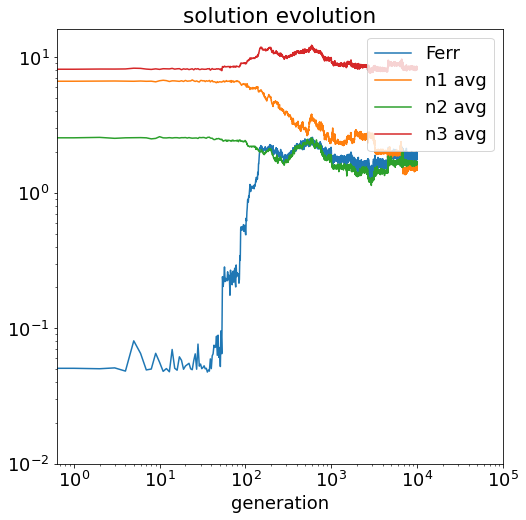

superheat (K), Q_s_data, Q_s_pred, percentdif:
72.40704 0.6961342355954646 0.07531235901488263 -89.18134532624137
71.10017 0.5120478003235612 0.05904320258429367 -88.46920101072898
68.97078 0.37723743037172913 0.04805869478765277 -87.2603588831851
66.61751 0.2812010145736971 0.04093484948778009 -85.44285142433158
64.08479 0.21371596563453946 0.03495260601165989 -83.64529954143441
60.74023 0.16699554713819958 0.03157985997625311 -81.0893999765642
54.43071 0.13353254653996638 0.027313113782398833 -79.54572537548064
45.65994 0.11073138503448766 0.02433218475477686 -78.0259365967485
37.83159 0.09016641449977393 0.022536165519485864 -75.00603118743025
31.28086 0.07435334977793583 0.02096730616239513 -71.8004552249277
meanAbspdifA =  37.24848202486694


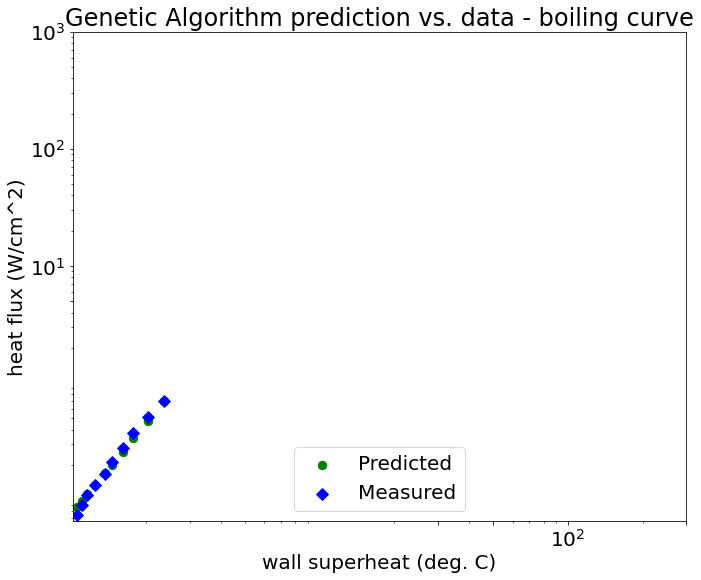

In [122]:
    # >>>>> ProtoGeneticSImBcurve_toUrsan -  HIGH SUPERHEAT
    #V.P. Carey 9/15/20
    #U. Tchouteng Njike 03/08/2021

    #import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)
acostmeanavgwMin=5   #run this on the very first run and comment it out afterwards

    iter=0   
    w1i = 6.866616726755815   #initial n1
    w2i = 2.2827630140123483  #initial n2
    w5i = 7.860750792633398   #initial n5
    Ferr=2                    #Arbitary estimated large error
    while acostmeanavgwMin>=0.048: #insert previous best Ferr or less to make sure the new best generation perform better
        
        #INITIALIZE VARIABLES
        ydata = []
        lydata = []
        w = []
        wtemp = []
        gen=[0]

        w1avg = [0.0]
        w2avg = [0.0]
        w5avg = [0.0]

        meanAcost=[0.0]
        acostmeanavgw=[0.0] 
        ND = len(DF_CuP)      #number of data vectors in array
        DI = 3        #number of data items in vector
        NS = len(DF_CuP)       #total number of DNA strands
        NGEN = 10000      #number of generations (steps)
        MFRAC = 0.6
        #here the number of data vectors equal the number if DNA strands (organisms)
        # they can be different if they are randomly paired to compute cost (survivability) function
        for k in range(NGEN-1):
            gen.append(k+1)   # generation array
            meanAcost.append(0.0)
            acostmeanavgw.append(0.0)

            w1avg.append(0.0)
            w2avg.append(0.0)
            w5avg.append(0.0)

        #Set constants in postulated fit relation
        m1=4
        m2=13

        # DNA paramters initial guesses
        w0i =  -1

        if acostmeanavgwMin < Ferr:
            w1i = w1min 
            w2i = w2min 
            w5i = w5min
            print('Ferr: ', acostmeanavgwMin, '\tn1: ', w1i, '\tn2: ', w2i, '\tn5: ', w5i)
            Ferr=acostmeanavgwMin


        #print data to confirm
        #print ('data =', DF_low)

        #initialize lydata to have same margtic form as roriginal data above
        #need deepcopy since this array is a list(rows) of lists (column entries)
        lnq = deepcopy(DF_CuP)

        #now store log values for data
        for i in range(ND):
            lnq['Q_s'][i]=np.log(DF_CuP['Q_s'][i]+0.000000000010)


        #OK now have stored array of log values for data
        #Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

        #store array where rows are dna vectors 
        w =  [[-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()]]
        for i in range(ND):
            w.append([-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()])

        # store also in wtemp
        wtemp = deepcopy(w)

        #initialize cost values
        cost =  [[0.0]]
        costavgw =  [[0.0]]
        acost =  [[0.0]]
        acostavgw =  [[0.0]]
        vcost =  [[0.0]]
        avcost =  [[0.0]]

        for i in range(ND-1):
            cost.append([0.0])
            acost.append([0.0])
            costavgw.append([0.0])
            acostavgw.append([0.0])
            vcost.append([0.0])
            avcost.append([0.0])

        acostmeanavgwMin=1000000000.0 

        w1min = 0.0
        w2min = 0.0
        w5min = 0.0

        acostta = 0.0

        w1ta = 0.0
        w2ta = 0.0
        w5ta = 0.0

        trat = 0.0

        #start of evolution loop, number of generations = NGEN
        # ----------------------
        for k in range(NGEN):

            #calculate costs
            for i in range(ND):
                cost[i] = w[i][0]*lnq['Q_s'][i] + math.log(w[i][1]) + w[i][2]*DF_CuP['Ja_s'][i] - w[i][5]*math.log(DF_CuP['Pr_l'][i]) 
                #trat = (w[i][2]*(DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m1) + ((DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m2)
                #cost[i] = -math.log(DF['alpha'][i]) -w[i][3]*math.log(1.00000001 + trat)

                acost[i] = abs(cost[i])/abs(lnq['Q_s'][i])
            #-------------
            acostmean = numpy.mean(acost)
            acostmedian = numpy.median(acost)

        #pick survivors 
            clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
            nkeep = 0

            for j in range(NS):  # NS cost values, one for each strand
                #print('acost,clim=', acost[j],clim)
                if (acost[j] < clim):
                    nkeep = nkeep + 1
                    #wtemp[nkeep][0] = w[j][0];

                    wtemp[nkeep-1][1] = w[j][1];
                    wtemp[nkeep-1][2] = w[j][2];
                    wtemp[nkeep-1][5] = w[j][5];

            # uncomment to print number kept this generation
            #print('nkeep=', nkeep)

            #now have survivors in leading entries in list of vectors from 1 to nkeep

            #compute number to be added by mating
            nnew = NS - nkeep  
            for j in range(nnew): 
                # pick two survivors randomly
                nmate1 = numpy.random.randint(low=0, high=nkeep+1)
                nmate2 = numpy.random.randint(low=0, high=nkeep+1)

                #then randomly pick DNA from parents for offspring

                # here, do not change property 0, it's just the -1 multiplier
                #if (numpy.random.rand() < 0.5)
                #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
                #else
                #    wtemp[nkeep+j+1][0] = w[nmate2][0]


                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][1] = w[nmate1][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
                else:
                    wtemp[nkeep+j+1][1] = w[nmate2][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))

                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][2] = w[nmate1][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
                else:
                    wtemp[nkeep+j+1][2] = w[nmate2][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))

                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][5] = w[nmate1][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
                else:
                    wtemp[nkeep+j+1][5] = w[nmate2][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            # set w = wtemp
            w = deepcopy(wtemp)


            w1avg[k] = 0.0;
            w2avg[k] = 0.0;
            w5avg[k] = 0.0;


            for j in range(NS):  # NS cost values, one for each strand    
                w1avg[k] = w1avg[k] + w[j][1]/NS;
                w2avg[k] = w2avg[k] + w[j][2]/NS;
                w5avg[k] = w5avg[k] + w[j][5]/NS;


            #gen[k]=k
            meanAcost[k]=acostmean

            #calculate costs for averaged DNA values
            for i in range(ND):  

                costavgw[i] = -1.*lnq['Q_s'][i] + math.log(w1avg[k]) + w2avg[k]*math.log(DF_CuP['Ja_s'][i]) - w5avg[k]*math.log(DF_CuP['Pr_l'][i])
                #trat = (w2avg[k]*(DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w3avg[k])**m1) + ((DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w1avg[k])**m2)
                #costavgw[i] = -math.log(DF['Q_s'][i]) -w3avg[k]*math.log(1.00000001 + trat)

                acostavgw[i] = abs(costavgw[i])/abs(lnq['Q_s'][i])

            #-------------

            acostmeanavgw[k] = numpy.mean(acostavgw)

            if (acostmeanavgw[k] < acostmeanavgwMin):
                acostmeanavgwMin = acostmeanavgw[k] 
                w1min = w1avg[k]
                w2min = w2avg[k]
                w5min = w5avg[k]

            acostta = acostta + acostmeanavgw[k]/NGEN
            if (k > 800):
                w1ta = w1ta + w1avg[k]/(NGEN-800)
                w2ta = w2ta + w2avg[k]/(NGEN-800)
                w5ta = w5ta + w5avg[k]/(NGEN-800)

            #print('avg w1-w5:', w1avg[k], w2avg[k], w3avg[k], w4avg[k], w5avg[k], acostmeanavgw[k])
            kvalue = k

            #end of evolution loop
            # ----------------------
            # ----------------------
        
        iter+=1

    print('iter: ', iter)
    #final print and plot of results
    print('ENDING:     avg w1-w5,acostmean:', w1avg[k], w2avg[k], w5avg[k], acostmeanavgw[k])
    print('MINUMUM:    min w1-w5,acostmean:', w1min, w2min, w5min, acostmeanavgwMin)
    print('TIME AVG:  timeavg w1-w5,acostmean:', w1ta, w2ta, w5ta, acostta)

#plotting n3, n4, n5, n6, and Ferr from the genetic algorithme
    plt.rcParams.update({'font.size': 18})
    #plt.plot(gen, meanAcost) 
    plt.plot(gen, acostmeanavgw)
    plt.plot(gen, w1avg)
    plt.plot(gen, w2avg)
    plt.plot(gen, w5avg)

    #plt.rcParams.update({'font.size': 12})
    plt.legend(['Ferr', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')
    # naming the x axis 
    plt.xlabel('generation') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000,100000])

    # uncomment next line to give a title to the graph 
    plt.title('solution evolution') 
    # function to show the plot 
    plt.show()   #TO HERE ***********************

    #initialize values
    QpredA =  [[0.0]]
    QpredM =  [[0.0]]
    QdataA =  [[0.0]]
    pdifA = [[0.0]]
    shData = [[0.0]]
    for i in range(0,ND-1):
        QpredA.append([0.0])
        QdataA.append([0.0])
        QpredM.append([0.0])
        pdifA.append([0.0]) 
        shData.append([0.0])

    #calculate predicted dimensionless values
    print('superheat (K), Q_s_data, Q_s_pred, percentdif:')
    meanAbspdifA = 0.0
    for i in range(0, ND):
        #trat = 1.0 + (w4ta*(DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m1) + ((DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m2)
        QpredA[i] = w1ta*DF_CuP['Ja_s'][i]**w2ta*DF_CuP['Pr_l'][i]**(-w5ta)
        
        #trat = 1.0 + (w4min*(DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m1) + ((DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m2)
        QpredM[i] = w1min*DF_CuP['Ja_s'][i]**w2min*DF_CuP['Pr_l'][i]**(-w5min)
        QdataA[i] = DF_CuP['Q_s'][i]
        shData[i] = DF_CuP['Ja_s'][i]
        pdifA[i] = 100.*(QpredA[i]-QdataA[i])/QdataA[i]
        print(DF['dT'][i],DF_CuP['Q_s'][i], QpredA[i], pdifA[i])
        meanAbspdifA = meanAbspdifA + abs(pdifA[i]/22.)
    print ('meanAbspdifA = ', meanAbspdifA)

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(11,9))
    #plt.scatter(shData, qpppredA, s=70, color='red')
    plt.scatter(shData, QpredM, s=70, color='green')
    plt.scatter(shData, QdataA, s=70, color='blue', marker='D')
    plt.legend(['Predicted','Measured'],loc='lower center')
    plt.title('Genetic Algorithm prediction vs. data - boiling curve')
    plt.xlabel('wall superheat (deg. C)')
    plt.ylabel('heat flux (W/cm^2)')
    plt.loglog()
    plt.yticks([5.,10.,100.,1000.])
    plt.xticks([30.,50.,100.,300.])
    plt.show()

From repeated and adjusted run of the cell above, we obtained an n values with an $F_{err} = 0.047$ with $\hat{n}_1=6.629$, $\hat{n}_2=2.577$, and $\hat{n}_5=8.245$. Now that we have optimized Copper Plane Substrate's $\hat{n}_1, \hat{n}_2, and \space \hat{n}_5$ constants, Let us add them to our dataframe

In [123]:
DF_CuP['n1hat']=[6.629 for n in range(len(DF_CuP))]

DF_CuP['n2hat']=[2.577 for n in range(len(DF_CuP))]

DF_CuP['n5hat']=[8.245 for n in range(len(DF_CuP))]

DF_CuP

,Q_s,Ja_s,Pr_l,n1hat,n2hat,n5hat
0,0.696134,2.367368,1.72,6.629,2.577,8.245
1,0.512048,2.029560,1.72,6.629,2.577,8.245
2,0.377237,1.781757,1.72,6.629,2.577,8.245
3,0.281201,1.609791,1.72,6.629,2.577,8.245
4,0.213716,1.456681,1.72,6.629,2.577,8.245
5,0.166996,1.366111,1.72,6.629,2.577,8.245
6,0.133533,1.246256,1.72,6.629,2.577,8.245
7,0.110731,1.158396,1.72,6.629,2.577,8.245
8,0.090166,1.103546,1.72,6.629,2.577,8.245
9,0.074353,1.054306,1.72,6.629,2.577,8.245


## Let us analyze Copper Nano Substrate and evaluate its $\hat{n}_1$, $\hat{n}_2$, and $\hat{n}_5$

In [13]:
DF_CuN=DF_CuN[['Q_s','Ja_s','Pr_l']]
DF_CuN

,Q_s,Ja_s,Pr_l
0,1.063149,2.246560,1.72
1,0.889485,2.021723,1.72
2,0.739381,1.814888,1.72
3,0.636715,1.662171,1.72
4,0.550343,1.527339,1.72
5,0.465008,1.424491,1.72
6,0.406268,1.341102,1.72
7,0.332434,1.245912,1.72
8,0.294379,1.160248,1.72
9,0.251571,1.096901,1.72


Ferr:  0.08626133112590309 	n1:  6.9189667657909855 	n2:  1.8476403926064253 	n5:  6.216497277390017
Ferr:  0.08410427981596982 	n1:  6.920455429279345 	n2:  1.857698088392547 	n5:  6.2057590060783525
Ferr:  0.08337952245052836 	n1:  6.95079738374206 	n2:  1.8851805518519802 	n5:  6.257974788855216
Ferr:  0.0814532012545757 	n1:  6.8755323617881565 	n2:  1.8827020024474141 	n5:  6.251147689781641
Ferr:  0.08144214144418302 	n1:  6.824781222595968 	n2:  1.8675993072905113 	n5:  6.216756029107269
11
ENDING:     avg w1-w5,acostmean: 0.7136456867178793 1.413341640753043 4.816257389549948 5.316064650928049
MINUMUM:    min w1-w5,acostmean: 6.821845079265386 1.8597265687222087 6.203902965012891 0.08080693280998934
TIME AVG:  timeavg w1-w5,acostmean: 2.901658870449927 1.7565143221445105 7.616753414339059 5.800246225214746


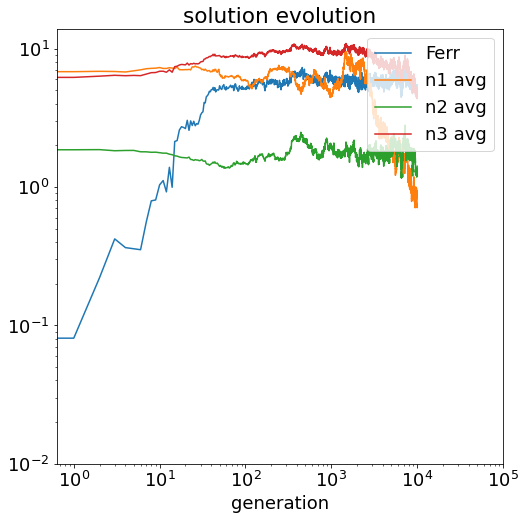

superheat (K), Q_s_data, Q_s_pred, percentdif:
72.40704 1.063149078672268 0.19325495502410253 -81.82240300057897
71.10017 0.8894848906033944 0.16057892228135584 -81.94697583087387
68.97078 0.7393805716907946 0.13284882834358136 -82.03241558812041
66.61751 0.6367154469437092 0.11384244332272721 -82.1203578664251
64.08479 0.5503425706979116 0.09812272229100849 -82.17061017711657
60.74023 0.4650079259742549 0.08681401013075203 -81.33063862323102
54.43071 0.4062679810100532 0.07808595857058366 -80.77969167630482
45.65994 0.3324337469931878 0.06861339387043029 -79.36028020890541
37.83159 0.2943785685085622 0.06054369148420271 -79.43339021215407
31.28086 0.25157148421106107 0.05485783776212398 -78.19393643355068
25.83957 0.2140354214875059 0.05047097276767596 -76.41933638044011
21.364 0.19770324100459732 0.04616055900680677 -76.6515921680144
17.69793 0.16847303045816928 0.04288639319053863 -74.54406021313481
meanAbspdifA =  47.12753128994773


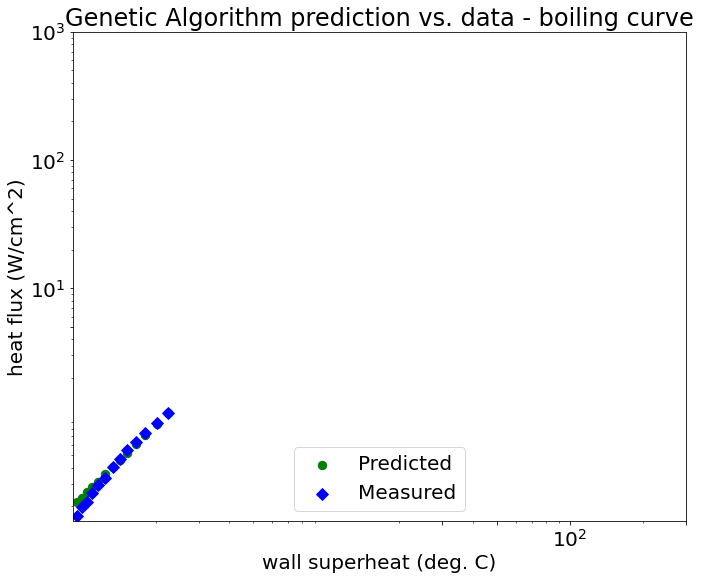

In [127]:
    # >>>>> ProtoGeneticSImBcurve_toUrsan -  HIGH SUPERHEAT
    #V.P. Carey 9/15/20
    #U. Tchouteng Njike 03/08/2021

    #import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)

acostmeanavgwMin=5   #run this on the very first run and comment it out afterwards

    iter=0   
    w1i = 6.897790222856905   #initial n1
    w2i = 1.8572989222515466  #initial n2
    w5i = 6.217424081311958   #initial n5
    Ferr=2             #Ferr of the initial weights
    
    while acostmeanavgwMin>=0.081:
        #INITIALIZE VARIABLES
        ydata = []
        lydata = []
        w = []
        wtemp = []
        gen=[0]

        w1avg = [0.0]
        w2avg = [0.0]
        w5avg = [0.0]

        meanAcost=[0.0]
        acostmeanavgw=[0.0] 
        ND = len(DF_CuN)      #number of data vectors in array
        DI = 3        #number of data items in vector
        NS = len(DF_CuN)       #total number of DNA strands
        NGEN = 10000      #number of generations (steps)
        MFRAC = 0.6
        #here the number of data vectors equal the number if DNA strands (organisms)
        # they can be different if they are randomly paired to compute cost (survivability) function
        for k in range(NGEN-1):
            gen.append(k+1)   # generation array
            meanAcost.append(0.0)
            acostmeanavgw.append(0.0)

            w1avg.append(0.0)
            w2avg.append(0.0)
            w5avg.append(0.0)

        #Set constants in postulated fit relation
        m1=4
        m2=13

        # DNA paramters initial guesses
        w0i =  -1

        if acostmeanavgwMin < Ferr:
            w1i = w1min 
            w2i = w2min 
            w5i = w5min
            print('Ferr: ', acostmeanavgwMin, '\tn1: ', w1i, '\tn2: ', w2i, '\tn5: ', w5i)
            Ferr=acostmeanavgwMin

        #print data to confirm
        #print ('data =', DF_low)

        #initialize lydata to have same margtic form as roriginal data above
        #need deepcopy since this array is a list(rows) of lists (column entries)
        lnq = deepcopy(DF_CuN)

        #now store log values for data
        for i in range(ND):
            lnq['Q_s'][i]=np.log(DF_CuN['Q_s'][i]+0.000000000010)


        #OK now have stored array of log values for data
        #Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

        #store array where rows are dna vectors 
        w =  [[-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()]]
        for i in range(ND):
            w.append([-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()])

        # store also in wtemp
        wtemp = deepcopy(w)

        #initialize cost values
        cost =  [[0.0]]
        costavgw =  [[0.0]]
        acost =  [[0.0]]
        acostavgw =  [[0.0]]
        vcost =  [[0.0]]
        avcost =  [[0.0]]

        for i in range(ND-1):
            cost.append([0.0])
            acost.append([0.0])
            costavgw.append([0.0])
            acostavgw.append([0.0])
            vcost.append([0.0])
            avcost.append([0.0])

        acostmeanavgwMin=1000000000.0 

        w1min = 0.0
        w2min = 0.0
        w5min = 0.0

        acostta = 0.0

        w1ta = 0.0
        w2ta = 0.0
        w5ta = 0.0

        trat = 0.0

        #start of evolution loop, number of generations = NGEN
        # ----------------------
        for k in range(NGEN):

            #calculate costs
            for i in range(ND):
                cost[i] = w[i][0]*lnq['Q_s'][i] + math.log(w[i][1]) + w[i][2]*DF_CuN['Ja_s'][i] - w[i][5]*math.log(DF_CuN['Pr_l'][i]) 
                #trat = (w[i][2]*(DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m1) + ((DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m2)
                #cost[i] = -math.log(DF['alpha'][i]) -w[i][3]*math.log(1.00000001 + trat)

                acost[i] = abs(cost[i])/abs(lnq['Q_s'][i])
            #-------------
            acostmean = numpy.mean(acost)
            acostmedian = numpy.median(acost)

        #pick survivors 
            clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
            nkeep = 0

            for j in range(NS):  # NS cost values, one for each strand
                #print('acost,clim=', acost[j],clim)
                if (acost[j] < clim):
                    nkeep = nkeep + 1
                    #wtemp[nkeep][0] = w[j][0];

                    wtemp[nkeep-1][1] = w[j][1];
                    wtemp[nkeep-1][2] = w[j][2];
                    wtemp[nkeep-1][5] = w[j][5];

            # uncomment to print number kept this generation
            #print('nkeep=', nkeep)

            #now have survivors in leading entries in list of vectors from 1 to nkeep

            #compute number to be added by mating
            nnew = NS - nkeep  
            for j in range(nnew): 
                # pick two survivors randomly
                nmate1 = numpy.random.randint(low=0, high=nkeep+1)
                nmate2 = numpy.random.randint(low=0, high=nkeep+1)

                #then randomly pick DNA from parents for offspring

                # here, do not change property 0, it's just the -1 multiplier
                #if (numpy.random.rand() < 0.5)
                #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
                #else
                #    wtemp[nkeep+j+1][0] = w[nmate2][0]


                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][1] = w[nmate1][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
                else:
                    wtemp[nkeep+j+1][1] = w[nmate2][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))

                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][2] = w[nmate1][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
                else:
                    wtemp[nkeep+j+1][2] = w[nmate2][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))

                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][5] = w[nmate1][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
                else:
                    wtemp[nkeep+j+1][5] = w[nmate2][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            # set w = wtemp
            w = deepcopy(wtemp)


            w1avg[k] = 0.0;
            w2avg[k] = 0.0;
            w5avg[k] = 0.0;


            for j in range(NS):  # NS cost values, one for each strand    
                w1avg[k] = w1avg[k] + w[j][1]/NS;
                w2avg[k] = w2avg[k] + w[j][2]/NS;
                w5avg[k] = w5avg[k] + w[j][5]/NS;


            #gen[k]=k
            meanAcost[k]=acostmean

            #calculate costs for averaged DNA values
            for i in range(ND):  

                costavgw[i] = -1.*lnq['Q_s'][i] + math.log(w1avg[k]) + w2avg[k]*math.log(DF_CuN['Ja_s'][i]) - w5avg[k]*math.log(DF_CuN['Pr_l'][i])
                #trat = (w2avg[k]*(DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w3avg[k])**m1) + ((DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w1avg[k])**m2)
                #costavgw[i] = -math.log(DF['Q_s'][i]) -w3avg[k]*math.log(1.00000001 + trat)

                acostavgw[i] = abs(costavgw[i])/abs(lnq['Q_s'][i])

            #-------------

            acostmeanavgw[k] = numpy.mean(acostavgw)

            if (acostmeanavgw[k] < acostmeanavgwMin):
                acostmeanavgwMin = acostmeanavgw[k] 
                w1min = w1avg[k]
                w2min = w2avg[k]
                w5min = w5avg[k]

            acostta = acostta + acostmeanavgw[k]/NGEN
            if (k > 800):
                w1ta = w1ta + w1avg[k]/(NGEN-800)
                w2ta = w2ta + w2avg[k]/(NGEN-800)
                w5ta = w5ta + w5avg[k]/(NGEN-800)

            #print('avg w1-w5:', w1avg[k], w2avg[k], w3avg[k], w4avg[k], w5avg[k], acostmeanavgw[k])
            kvalue = k

            #end of evolution loop
            # ----------------------
            # ----------------------
        iter+=1
            
    print(iter)

    #final print and plot of results
    print('ENDING:     avg w1-w5,acostmean:', w1avg[k], w2avg[k], w5avg[k], acostmeanavgw[k])
    print('MINUMUM:    min w1-w5,acostmean:', w1min, w2min, w5min, acostmeanavgwMin)
    print('TIME AVG:  timeavg w1-w5,acostmean:', w1ta, w2ta, w5ta, acostta)

#plotting n3, n4, n5, n6, and Ferr from the genetic algorithme
    plt.rcParams.update({'font.size': 18})
    #plt.plot(gen, meanAcost) 
    plt.plot(gen, acostmeanavgw)
    plt.plot(gen, w1avg)
    plt.plot(gen, w2avg)
    plt.plot(gen, w5avg)

    #plt.rcParams.update({'font.size': 12})
    plt.legend(['Ferr', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')
    # naming the x axis 
    plt.xlabel('generation') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000,100000])

    # uncomment next line to give a title to the graph 
    plt.title('solution evolution') 
    # function to show the plot 
    plt.show()   #TO HERE ***********************

    #initialize values
    QpredA =  [[0.0]]
    QpredM =  [[0.0]]
    QdataA =  [[0.0]]
    pdifA = [[0.0]]
    shData = [[0.0]]
    for i in range(0,ND-1):
        QpredA.append([0.0])
        QdataA.append([0.0])
        QpredM.append([0.0])
        pdifA.append([0.0]) 
        shData.append([0.0])

    #calculate predicted dimensionless values
    print('superheat (K), Q_s_data, Q_s_pred, percentdif:')
    meanAbspdifA = 0.0
    for i in range(0, ND):
        #trat = 1.0 + (w4ta*(DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m1) + ((DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m2)
        QpredA[i] = w1ta*DF_CuN['Ja_s'][i]**w2ta*DF_CuN['Pr_l'][i]**(-w5ta)
        
        #trat = 1.0 + (w4min*(DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m1) + ((DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m2)
        QpredM[i] = w1min*DF_CuN['Ja_s'][i]**w2min*DF_CuN['Pr_l'][i]**(-w5min)
        QdataA[i] = DF_CuN['Q_s'][i]
        shData[i] = DF_CuN['Ja_s'][i]
        pdifA[i] = 100.*(QpredA[i]-QdataA[i])/QdataA[i]
        print(DF['dT'][i],DF_CuN['Q_s'][i], QpredA[i], pdifA[i])
        meanAbspdifA = meanAbspdifA + abs(pdifA[i]/22.)
    print ('meanAbspdifA = ', meanAbspdifA)

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(11,9))
    #plt.scatter(shData, qpppredA, s=70, color='red')
    plt.scatter(shData, QpredM, s=70, color='green')
    plt.scatter(shData, QdataA, s=70, color='blue', marker='D')
    plt.legend(['Predicted','Measured'],loc='lower center')
    plt.title('Genetic Algorithm prediction vs. data - boiling curve')
    plt.xlabel('wall superheat (deg. C)')
    plt.ylabel('heat flux (W/cm^2)')
    plt.loglog()
    plt.yticks([5.,10.,100.,1000.])
    plt.xticks([30.,50.,100.,300.])
    plt.show()

Similarly to the Copper Plane Substrate, we determine $F_{err} = 0.081$ with $n_1=6.898$, $n_2=1.857$, and $n_5=6.217$. Now that we have optimized Copper Nano Substrate's $\hat{n}_1, \hat{n}_2, and \space \hat{n}_5$ constants, Let us add them to our dataframe

In [128]:
DF_CuN['n1hat']=[6.898 for n in range(len(DF_CuN))]

DF_CuN['n2hat']=[1.857 for n in range(len(DF_CuN))]

DF_CuN['n5hat']=[6.217 for n in range(len(DF_CuN))]

DF_CuN

,Q_s,Ja_s,Pr_l,n1hat,n2hat,n5hat
0,1.063149,2.246560,1.72,6.898,1.857,6.217
1,0.889485,2.021723,1.72,6.898,1.857,6.217
2,0.739381,1.814888,1.72,6.898,1.857,6.217
3,0.636715,1.662171,1.72,6.898,1.857,6.217
4,0.550343,1.527339,1.72,6.898,1.857,6.217
5,0.465008,1.424491,1.72,6.898,1.857,6.217
6,0.406268,1.341102,1.72,6.898,1.857,6.217
7,0.332434,1.245912,1.72,6.898,1.857,6.217
8,0.294379,1.160248,1.72,6.898,1.857,6.217
9,0.251571,1.096901,1.72,6.898,1.857,6.217


## Let us analyze Aluminum Plane Substrate and evaluate its $\hat{n}_1$, $\hat{n}_2$, and $\hat{n}_5$

In [74]:
DF_AlP=DF_AlP[['Q_s','Ja_s','Pr_l']]
DF_AlP

,Q_s,Ja_s,Pr_l
0,0.660518,2.365952,1.72
1,0.560596,2.085656,1.72
2,0.486755,1.835130,1.72
3,0.411618,1.636286,1.72
4,0.352609,1.471230,1.72
5,0.300399,1.331450,1.72
6,0.257480,1.223241,1.72
7,0.220135,1.126184,1.72


Ferr:  0.032970554311760575 	n1:  6.961300556744029 	n2:  1.4501454913683764 	n5:  6.6211997771960815
2
ENDING:     avg w1-w5,acostmean: 9.113463695203876 0.559856748114405 7.515413313347133 0.9054431572213101
MINUMUM:    min w1-w5,acostmean: 6.750317381757894 1.4242154591410592 6.5243493548555955 0.029808604415252467
TIME AVG:  timeavg w1-w5,acostmean: 8.628782050616689 0.6834669101153438 7.735497214186414 1.057519096586463


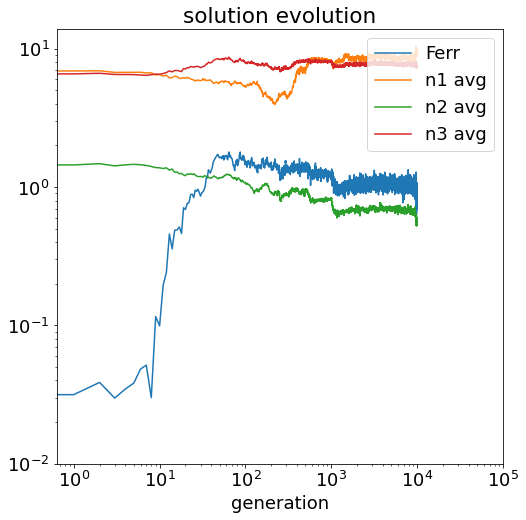

superheat (K), Q_s_data, Q_s_pred, percentdif:
72.40704 0.6605181025482377 0.2342289457273593 -64.53860313234132
71.10017 0.5605959056186853 0.21488775199745308 -61.66797690748411
68.97078 0.4867552824847605 0.19689173630902423 -59.55015931127803
66.61751 0.4116184672274246 0.18204783619847117 -55.77267525805946
64.08479 0.3526093407751171 0.16928712782747418 -51.990174890052025
60.74023 0.30039907344554917 0.15812178316350706 -47.36275936211618
54.43071 0.25747986014365676 0.14922153698656357 -42.04535574032555
45.65994 0.2201353511359366 0.1410240468103863 -35.93757382325113
meanAbspdifA =  19.039330837495807


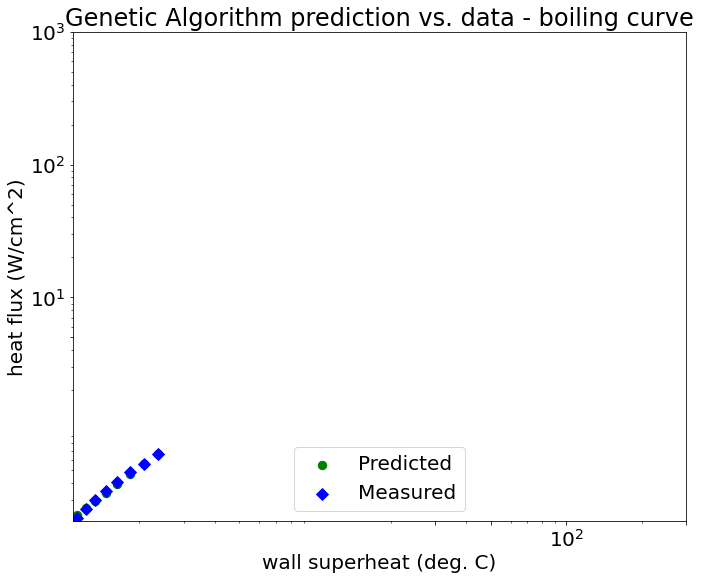

In [130]:
    # >>>>> ProtoGeneticSImBcurve_toUrsan -  HIGH SUPERHEAT
    #V.P. Carey 9/15/20
    #U. Tchouteng Njike 03/08/2021

    #import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)

acostmeanavgwMin=5   #run this on the very first run and comment it out afterwards

    iter=0   
    w1i =  6.995183343174305    #initial n1                                                                                                                                                                                                       
    w2i =  1.4525421260879754   #initial n2
    w3i =  1                    #initial n3
    w4i =  1                    #initial n4      
    w5i =  6.622947905318881    #initial n5
    Ferr=2             #Ferr of the initial weights
    
    while acostmeanavgwMin>=0.0301: #insert previous best Ferr to make sure the new best generation perform better
        #INITIALIZE VARIABLES
        ydata = []
        lydata = []
        w = []
        wtemp = []
        gen=[0]

        w1avg = [0.0]
        w2avg = [0.0]
        w5avg = [0.0]

        meanAcost=[0.0]
        acostmeanavgw=[0.0] 
        ND = len(DF_AlP)      #number of data vectors in array
        DI = 3        #number of data items in vector
        NS = len(DF_AlP)       #total number of DNA strands
        NGEN = 10000      #number of generations (steps)
        MFRAC = 0.6
        #here the number of data vectors equal the number if DNA strands (organisms)
        # they can be different if they are randomly paired to compute cost (survivability) function
        for k in range(NGEN-1):
            gen.append(k+1)   # generation array
            meanAcost.append(0.0)
            acostmeanavgw.append(0.0)

            w1avg.append(0.0)
            w2avg.append(0.0)
            w5avg.append(0.0)

        #Set constants in postulated fit relation
        m1=4
        m2=13

        # DNA paramters initial guesses
        w0i =  -1

        if acostmeanavgwMin < Ferr:
            w1i = w1min 
            w2i = w2min 
            w5i = w5min
            print('Ferr: ', acostmeanavgwMin, '\tn1: ', w1i, '\tn2: ', w2i, '\tn5: ', w5i)
            Ferr=acostmeanavgwMin

        #print data to confirm
        #print ('data =', DF_low)

        #initialize lydata to have same margtic form as roriginal data above
        #need deepcopy since this array is a list(rows) of lists (column entries)
        lnq = deepcopy(DF_AlP)

        #now store log values for data
        for i in range(ND):
            lnq['Q_s'][i]=np.log(DF_AlP['Q_s'][i]+0.000000000010)


        #OK now have stored array of log values for data
        #Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

        #store array where rows are dna vectors 
        w =  [[-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()]]
        for i in range(ND):
            w.append([-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()])

        # store also in wtemp
        wtemp = deepcopy(w)

        #initialize cost values
        cost =  [[0.0]]
        costavgw =  [[0.0]]
        acost =  [[0.0]]
        acostavgw =  [[0.0]]
        vcost =  [[0.0]]
        avcost =  [[0.0]]

        for i in range(ND-1):
            cost.append([0.0])
            acost.append([0.0])
            costavgw.append([0.0])
            acostavgw.append([0.0])
            vcost.append([0.0])
            avcost.append([0.0])

        acostmeanavgwMin=1000000000.0 

        w1min = 0.0
        w2min = 0.0
        w5min = 0.0

        acostta = 0.0

        w1ta = 0.0
        w2ta = 0.0
        w5ta = 0.0

        trat = 0.0

        #start of evolution loop, number of generations = NGEN
        # ----------------------
        for k in range(NGEN):

            #calculate costs
            for i in range(ND):
                cost[i] = w[i][0]*lnq['Q_s'][i] + math.log(w[i][1]) + w[i][2]*DF_AlP['Ja_s'][i] - w[i][5]*math.log(DF_AlP['Pr_l'][i]) 
                #trat = (w[i][2]*(DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m1) + ((DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m2)
                #cost[i] = -math.log(DF['alpha'][i]) -w[i][3]*math.log(1.00000001 + trat)

                acost[i] = abs(cost[i])/abs(lnq['Q_s'][i])
            #-------------
            acostmean = numpy.mean(acost)
            acostmedian = numpy.median(acost)

        #pick survivors 
            clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
            nkeep = 0

            for j in range(NS):  # NS cost values, one for each strand
                #print('acost,clim=', acost[j],clim)
                if (acost[j] < clim):
                    nkeep = nkeep + 1
                    #wtemp[nkeep][0] = w[j][0];

                    wtemp[nkeep-1][1] = w[j][1];
                    wtemp[nkeep-1][2] = w[j][2];
                    wtemp[nkeep-1][5] = w[j][5];

            # uncomment to print number kept this generation
            #print('nkeep=', nkeep)

            #now have survivors in leading entries in list of vectors from 1 to nkeep

            #compute number to be added by mating
            nnew = NS - nkeep  
            for j in range(nnew): 
                # pick two survivors randomly
                nmate1 = numpy.random.randint(low=0, high=nkeep+1)
                nmate2 = numpy.random.randint(low=0, high=nkeep+1)

                #then randomly pick DNA from parents for offspring

                # here, do not change property 0, it's just the -1 multiplier
                #if (numpy.random.rand() < 0.5)
                #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
                #else
                #    wtemp[nkeep+j+1][0] = w[nmate2][0]


                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][1] = w[nmate1][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
                else:
                    wtemp[nkeep+j+1][1] = w[nmate2][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))

                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][2] = w[nmate1][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
                else:
                    wtemp[nkeep+j+1][2] = w[nmate2][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))

                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][5] = w[nmate1][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
                else:
                    wtemp[nkeep+j+1][5] = w[nmate2][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            # set w = wtemp
            w = deepcopy(wtemp)


            w1avg[k] = 0.0;
            w2avg[k] = 0.0;
            w5avg[k] = 0.0;


            for j in range(NS):  # NS cost values, one for each strand    
                w1avg[k] = w1avg[k] + w[j][1]/NS;
                w2avg[k] = w2avg[k] + w[j][2]/NS;
                w5avg[k] = w5avg[k] + w[j][5]/NS;


            #gen[k]=k
            meanAcost[k]=acostmean

            #calculate costs for averaged DNA values
            for i in range(ND):  

                costavgw[i] = -1.*lnq['Q_s'][i] + math.log(w1avg[k]) + w2avg[k]*math.log(DF_AlP['Ja_s'][i]) - w5avg[k]*math.log(DF_AlP['Pr_l'][i])
                #trat = (w2avg[k]*(DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w3avg[k])**m1) + ((DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w1avg[k])**m2)
                #costavgw[i] = -math.log(DF['Q_s'][i]) -w3avg[k]*math.log(1.00000001 + trat)

                acostavgw[i] = abs(costavgw[i])/abs(lnq['Q_s'][i])

            #-------------

            acostmeanavgw[k] = numpy.mean(acostavgw)

            if (acostmeanavgw[k] < acostmeanavgwMin):
                acostmeanavgwMin = acostmeanavgw[k] 
                w1min = w1avg[k]
                w2min = w2avg[k]
                w5min = w5avg[k]

            acostta = acostta + acostmeanavgw[k]/NGEN
            if (k > 800):
                w1ta = w1ta + w1avg[k]/(NGEN-800)
                w2ta = w2ta + w2avg[k]/(NGEN-800)
                w5ta = w5ta + w5avg[k]/(NGEN-800)

            #print('avg w1-w5:', w1avg[k], w2avg[k], w3avg[k], w4avg[k], w5avg[k], acostmeanavgw[k])
            kvalue = k

            #end of evolution loop
            # ----------------------
            # ----------------------
        iter+=1
            
    print(iter)

    #final print and plot of results
    print('ENDING:     avg w1-w5,acostmean:', w1avg[k], w2avg[k], w5avg[k], acostmeanavgw[k])
    print('MINUMUM:    min w1-w5,acostmean:', w1min, w2min, w5min, acostmeanavgwMin)
    print('TIME AVG:  timeavg w1-w5,acostmean:', w1ta, w2ta, w5ta, acostta)

#plotting n3, n4, n5, n6, and Ferr from the genetic algorithme
    plt.rcParams.update({'font.size': 18})
    #plt.plot(gen, meanAcost) 
    plt.plot(gen, acostmeanavgw)
    plt.plot(gen, w1avg)
    plt.plot(gen, w2avg)
    plt.plot(gen, w5avg)

    #plt.rcParams.update({'font.size': 12})
    plt.legend(['Ferr', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')
    # naming the x axis 
    plt.xlabel('generation') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000,100000])

    # uncomment next line to give a title to the graph 
    plt.title('solution evolution') 
    # function to show the plot 
    plt.show()   #TO HERE ***********************

    #initialize values
    QpredA =  [[0.0]]
    QpredM =  [[0.0]]
    QdataA =  [[0.0]]
    pdifA = [[0.0]]
    shData = [[0.0]]
    for i in range(0,ND-1):
        QpredA.append([0.0])
        QdataA.append([0.0])
        QpredM.append([0.0])
        pdifA.append([0.0]) 
        shData.append([0.0])

    #calculate predicted dimensionless values
    print('superheat (K), Q_s_data, Q_s_pred, percentdif:')
    meanAbspdifA = 0.0
    for i in range(0, ND):
        #trat = 1.0 + (w4ta*(DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m1) + ((DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m2)
        QpredA[i] = w1ta*DF_AlP['Ja_s'][i]**w2ta*DF_AlP['Pr_l'][i]**(-w5ta)
        
        #trat = 1.0 + (w4min*(DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m1) + ((DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m2)
        QpredM[i] = w1min*DF_AlP['Ja_s'][i]**w2min*DF_AlP['Pr_l'][i]**(-w5min)
        QdataA[i] = DF_AlP['Q_s'][i]
        shData[i] = DF_AlP['Ja_s'][i]
        pdifA[i] = 100.*(QpredA[i]-QdataA[i])/QdataA[i]
        print(DF['dT'][i],DF_AlP['Q_s'][i], QpredA[i], pdifA[i])
        meanAbspdifA = meanAbspdifA + abs(pdifA[i]/22.)
    print ('meanAbspdifA = ', meanAbspdifA)

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(11,9))
    #plt.scatter(shData, qpppredA, s=70, color='red')
    plt.scatter(shData, QpredM, s=70, color='green')
    plt.scatter(shData, QdataA, s=70, color='blue', marker='D')
    plt.legend(['Predicted','Measured'],loc='lower center')
    plt.title('Genetic Algorithm prediction vs. data - boiling curve')
    plt.xlabel('wall superheat (deg. C)')
    plt.ylabel('heat flux (W/cm^2)')
    plt.loglog()
    plt.yticks([5.,10.,100.,1000.])
    plt.xticks([30.,50.,100.,300.])
    plt.show()

Similarly to the first 2 Substrates, we determine $F_{err} = 0.03$ with $n_1=6.916$, $n_2=1.416$, and $n_5=6.533$. Now that we have optimized Aluminum Plane Substrate's $\hat{n}_1, \hat{n}_2, and \space \hat{n}_5$ constants, Let us add them to our dataframe

In [131]:
DF_AlP['n1hat']=[6.916 for n in range(len(DF_AlP))]

DF_AlP['n2hat']=[1.416 for n in range(len(DF_AlP))]

DF_AlP['n5hat']=[6.533 for n in range(len(DF_AlP))]

DF_AlP

,Q_s,Ja_s,Pr_l,n1hat,n2hat,n5hat
0,0.660518,2.365952,1.72,6.916,1.416,6.533
1,0.560596,2.085656,1.72,6.916,1.416,6.533
2,0.486755,1.835130,1.72,6.916,1.416,6.533
3,0.411618,1.636286,1.72,6.916,1.416,6.533
4,0.352609,1.471230,1.72,6.916,1.416,6.533
5,0.300399,1.331450,1.72,6.916,1.416,6.533
6,0.257480,1.223241,1.72,6.916,1.416,6.533
7,0.220135,1.126184,1.72,6.916,1.416,6.533


## Let us analyze Aluminum Nano Substrate and evaluate its $\hat{n}_1$, $\hat{n}_2$, and $\hat{n}_5$

In [96]:
DF_AlN=DF_AlN[['Q_s','Ja_s','Pr_l']]
DF_AlN

,Q_s,Ja_s,Pr_l
0,0.385622,2.300634,1.72
1,0.323729,2.156494,1.72
2,0.292414,2.024714,1.72
3,0.244920,1.910763,1.72
4,0.216037,1.811308,1.72
5,0.193729,1.721576,1.72
6,0.171664,1.643787,1.72
7,0.151742,1.571299,1.72


Ferr:  0.4208050663854259 	n1:  6.876833907533367 	n2:  1.4536995997781603 	n5:  6.787457692792061
Ferr:  0.3460365070964136 	n1:  6.887605236974411 	n2:  1.442867503836893 	n5:  6.966710838564729
Ferr:  0.27452010530809756 	n1:  6.82698787155794 	n2:  1.4413767262555448 	n5:  7.129870554068999
Ferr:  0.1969420722940579 	n1:  6.7398205312407935 	n2:  1.4212565083811006 	n5:  7.278393020014244
Ferr:  0.11902127544771675 	n1:  6.6604868378177295 	n2:  1.4156491280336907 	n5:  7.457908114483388
Ferr:  0.08250148029106644 	n1:  6.559110410047271 	n2:  1.4340801546264295 	n5:  7.6307194809764285
Ferr:  0.07702873269405631 	n1:  6.534470076953406 	n2:  1.466993526118895 	n5:  7.794114487647157
Ferr:  0.0742885236240584 	n1:  6.587947186062056 	n2:  1.4990625565599238 	n5:  7.856047457767666
Ferr:  0.07225193357814039 	n1:  6.5836698142905705 	n2:  1.526719604947175 	n5:  7.880298459523715
Ferr:  0.06945942312382505 	n1:  6.581113632887565 	n2:  1.5604694102946974 	n5:  7.924750463911339
Ferr

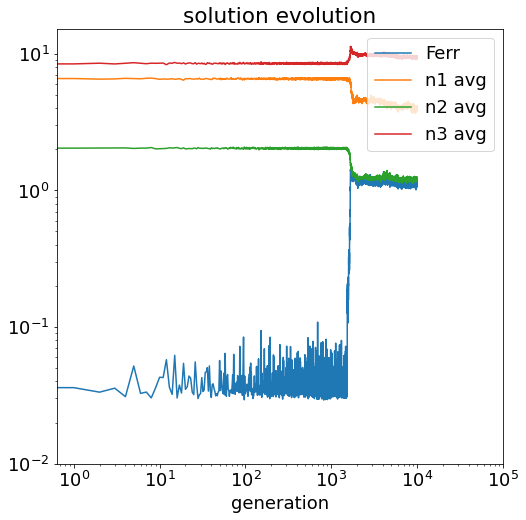

superheat (K), Q_s_data, Q_s_pred, percentdif:
2.3006342837394773 0.38562206834859414 0.07610545539936472 -80.26423754084348
2.1564936490031017 0.32372887568767433 0.06996941608897982 -78.38641488487897
2.024713687815685 0.29241434348298145 0.06446581085033257 -77.95395052018559
1.9107633481612762 0.24491974568956737 0.05979228250503598 -75.58698979672226
1.8113082261143112 0.21603679922878663 0.055780723469836105 -74.17998985868913
1.7215757933540097 0.1937290093358274 0.052217382321601516 -73.04617284699826
1.643787082436863 0.17166405700405918 0.04917290140711322 -71.35515595675892
1.5712987457421357 0.15174197340404866 0.046374379428017504 -69.43866065025078
meanAbspdifA =  27.282344184333063


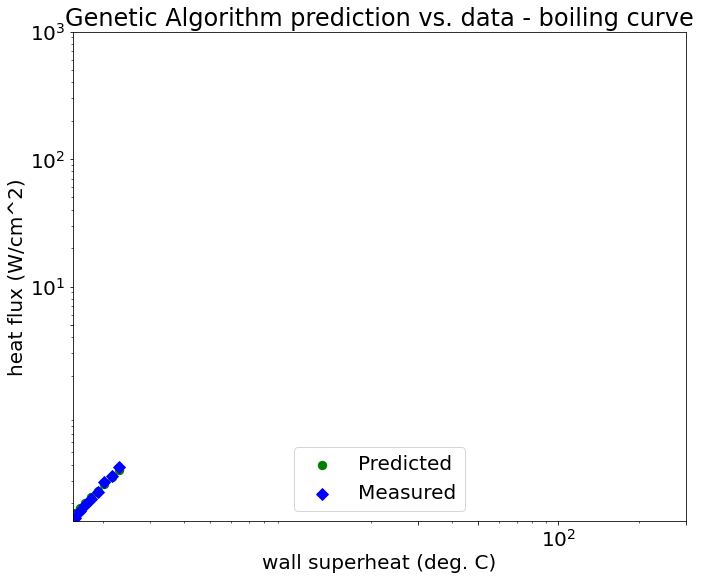

In [133]:
    # >>>>> ProtoGeneticSImBcurve_toUrsan -  HIGH SUPERHEAT
    #V.P. Carey 9/15/20
    #U. Tchouteng Njike 03/08/2021

    #import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)
acostmeanavgwMin=5   #run this on the very first run and comment it out afterwards

    iter=0   
    w1i =  6.995183343174305    #initial n1                                                                                                                                                                                                       
    w2i =  1.4525421260879754   #initial n2
    w3i =  1                    #initial n3
    w4i =  1                    #initial n4      
    w5i =  6.622947905318881    #initial n5
    Ferr=2             #Ferr of the initial weights
    while acostmeanavgwMin>=0.03: #insert previous best Ferr or less to make sure the new best generation perform better
        #INITIALIZE VARIABLES
        ydata = []
        lydata = []
        w = []
        wtemp = []
        gen=[0]

        w1avg = [0.0]
        w2avg = [0.0]
        w5avg = [0.0]

        meanAcost=[0.0]
        acostmeanavgw=[0.0] 
        ND = len(DF_AlN)      #number of data vectors in array
        DI = 3        #number of data items in vector
        NS = len(DF_AlN)       #total number of DNA strands
        NGEN = 10000      #number of generations (steps)
        MFRAC = 0.6
        #here the number of data vectors equal the number if DNA strands (organisms)
        # they can be different if they are randomly paired to compute cost (survivability) function
        for k in range(NGEN-1):
            gen.append(k+1)   # generation array
            meanAcost.append(0.0)
            acostmeanavgw.append(0.0)

            w1avg.append(0.0)
            w2avg.append(0.0)
            w5avg.append(0.0)

        #Set constants in postulated fit relation
        m1=4
        m2=13

        # DNA paramters initial guesses
        w0i =  -1
        
        
        if acostmeanavgwMin < Ferr:
            w1i = w1min 
            w2i = w2min 
            w5i = w5min
            print('Ferr: ', acostmeanavgwMin, '\tn1: ', w1i, '\tn2: ', w2i, '\tn5: ', w5i)
            Ferr=acostmeanavgwMin

        #print data to confirm
        #print ('data =', DF_low)

        #initialize lydata to have same margtic form as roriginal data above
        #need deepcopy since this array is a list(rows) of lists (column entries)
        lnq = deepcopy(DF_AlN)

        #now store log values for data
        for i in range(ND):
            lnq['Q_s'][i]=np.log(DF_AlN['Q_s'][i]+0.000000000010)


        #OK now have stored array of log values for data
        #Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

        #store array where rows are dna vectors 
        w =  [[-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()]]
        for i in range(ND):
            w.append([-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random()])

        # store also in wtemp
        wtemp = deepcopy(w)

        #initialize cost values
        cost =  [[0.0]]
        costavgw =  [[0.0]]
        acost =  [[0.0]]
        acostavgw =  [[0.0]]
        vcost =  [[0.0]]
        avcost =  [[0.0]]

        for i in range(ND-1):
            cost.append([0.0])
            acost.append([0.0])
            costavgw.append([0.0])
            acostavgw.append([0.0])
            vcost.append([0.0])
            avcost.append([0.0])

        acostmeanavgwMin=1000000000.0 

        w1min = 0.0
        w2min = 0.0
        w5min = 0.0

        acostta = 0.0

        w1ta = 0.0
        w2ta = 0.0
        w5ta = 0.0

        trat = 0.0

        #start of evolution loop, number of generations = NGEN
        # ----------------------
        for k in range(NGEN):

            #calculate costs
            for i in range(ND):
                cost[i] = w[i][0]*lnq['Q_s'][i] + math.log(w[i][1]) + w[i][2]*DF_AlN['Ja_s'][i] - w[i][5]*math.log(DF_AlN['Pr_l'][i]) 
                #trat = (w[i][2]*(DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m1) + ((DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m2)
                #cost[i] = -math.log(DF['alpha'][i]) -w[i][3]*math.log(1.00000001 + trat)

                acost[i] = abs(cost[i])/abs(lnq['Q_s'][i])
            #-------------
            acostmean = numpy.mean(acost)
            acostmedian = numpy.median(acost)

        #pick survivors 
            clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
            nkeep = 0

            for j in range(NS):  # NS cost values, one for each strand
                #print('acost,clim=', acost[j],clim)
                if (acost[j] < clim):
                    nkeep = nkeep + 1
                    #wtemp[nkeep][0] = w[j][0];

                    wtemp[nkeep-1][1] = w[j][1];
                    wtemp[nkeep-1][2] = w[j][2];
                    wtemp[nkeep-1][5] = w[j][5];

            # uncomment to print number kept this generation
            #print('nkeep=', nkeep)

            #now have survivors in leading entries in list of vectors from 1 to nkeep

            #compute number to be added by mating
            nnew = NS - nkeep  
            for j in range(nnew): 
                # pick two survivors randomly
                nmate1 = numpy.random.randint(low=0, high=nkeep+1)
                nmate2 = numpy.random.randint(low=0, high=nkeep+1)

                #then randomly pick DNA from parents for offspring

                # here, do not change property 0, it's just the -1 multiplier
                #if (numpy.random.rand() < 0.5)
                #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
                #else
                #    wtemp[nkeep+j+1][0] = w[nmate2][0]


                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][1] = w[nmate1][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
                else:
                    wtemp[nkeep+j+1][1] = w[nmate2][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))

                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][2] = w[nmate1][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
                else:
                    wtemp[nkeep+j+1][2] = w[nmate2][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))

                if (numpy.random.rand() < 0.5):
                    wtemp[nkeep+j+1][5] = w[nmate1][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
                else:
                    wtemp[nkeep+j+1][5] = w[nmate2][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            # set w = wtemp
            w = deepcopy(wtemp)


            w1avg[k] = 0.0;
            w2avg[k] = 0.0;
            w5avg[k] = 0.0;


            for j in range(NS):  # NS cost values, one for each strand    
                w1avg[k] = w1avg[k] + w[j][1]/NS;
                w2avg[k] = w2avg[k] + w[j][2]/NS;
                w5avg[k] = w5avg[k] + w[j][5]/NS;


            #gen[k]=k
            meanAcost[k]=acostmean

            #calculate costs for averaged DNA values
            for i in range(ND):  

                costavgw[i] = -1.*lnq['Q_s'][i] + math.log(w1avg[k]) + w2avg[k]*math.log(DF_AlN['Ja_s'][i]) - w5avg[k]*math.log(DF_AlN['Pr_l'][i])
                #trat = (w2avg[k]*(DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w3avg[k])**m1) + ((DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w1avg[k])**m2)
                #costavgw[i] = -math.log(DF['Q_s'][i]) -w3avg[k]*math.log(1.00000001 + trat)

                acostavgw[i] = abs(costavgw[i])/abs(lnq['Q_s'][i])

            #-------------

            acostmeanavgw[k] = numpy.mean(acostavgw)

            if (acostmeanavgw[k] < acostmeanavgwMin):
                acostmeanavgwMin = acostmeanavgw[k] 
                w1min = w1avg[k]
                w2min = w2avg[k]
                w5min = w5avg[k]

            acostta = acostta + acostmeanavgw[k]/NGEN
            if (k > 800):
                w1ta = w1ta + w1avg[k]/(NGEN-800)
                w2ta = w2ta + w2avg[k]/(NGEN-800)
                w5ta = w5ta + w5avg[k]/(NGEN-800)

            #print('avg w1-w5:', w1avg[k], w2avg[k], w3avg[k], w4avg[k], w5avg[k], acostmeanavgw[k])
            kvalue = k

            #end of evolution loop
            # ----------------------
            # ----------------------
        iter+=1
            
    print(iter)

    #final print and plot of results
    print('ENDING:     avg w1-w5,acostmean:', w1avg[k], w2avg[k], w5avg[k], acostmeanavgw[k])
    print('MINUMUM:    min w1-w5,acostmean:', w1min, w2min, w5min, acostmeanavgwMin)
    print('TIME AVG:  timeavg w1-w5,acostmean:', w1ta, w2ta, w5ta, acostta)

#plotting n3, n4, n5, n6, and Ferr from the genetic algorithme
    plt.rcParams.update({'font.size': 18})
    #plt.plot(gen, meanAcost) 
    plt.plot(gen, acostmeanavgw)
    plt.plot(gen, w1avg)
    plt.plot(gen, w2avg)
    plt.plot(gen, w5avg)

    #plt.rcParams.update({'font.size': 12})
    plt.legend(['Ferr', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')
    # naming the x axis 
    plt.xlabel('generation') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000,100000])

    # uncomment next line to give a title to the graph 
    plt.title('solution evolution') 
    # function to show the plot 
    plt.show()   #TO HERE ***********************

    #initialize values
    QpredA =  [[0.0]]
    QpredM =  [[0.0]]
    QdataA =  [[0.0]]
    pdifA = [[0.0]]
    shData = [[0.0]]
    for i in range(0,ND-1):
        QpredA.append([0.0])
        QdataA.append([0.0])
        QpredM.append([0.0])
        pdifA.append([0.0]) 
        shData.append([0.0])

    #calculate predicted dimensionless values
    print('superheat (K), Q_s_data, Q_s_pred, percentdif:')
    meanAbspdifA = 0.0
    for i in range(0, ND):
        #trat = 1.0 + (w4ta*(DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m1) + ((DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m2)
        QpredA[i] = w1ta*DF_AlN['Ja_s'][i]**w2ta*DF_AlN['Pr_l'][i]**(-w5ta)
        
        #trat = 1.0 + (w4min*(DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m1) + ((DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m2)
        QpredM[i] = w1min*DF_AlN['Ja_s'][i]**w2min*DF_AlN['Pr_l'][i]**(-w5min)
        QdataA[i] = DF_AlN['Q_s'][i]
        shData[i] = DF_AlN['Ja_s'][i]
        pdifA[i] = 100.*(QpredA[i]-QdataA[i])/QdataA[i]
        print(DF_AlN['Ja_s'][i],DF_AlN['Q_s'][i], QpredA[i], pdifA[i])
        meanAbspdifA = meanAbspdifA + abs(pdifA[i]/22.)
    print ('meanAbspdifA = ', meanAbspdifA)

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(11,9))
    #plt.scatter(shData, qpppredA, s=70, color='red')
    plt.scatter(shData, QpredM, s=70, color='green')
    plt.scatter(shData, QdataA, s=70, color='blue', marker='D')
    plt.legend(['Predicted','Measured'],loc='lower center')
    plt.title('Genetic Algorithm prediction vs. data - boiling curve')
    plt.xlabel('wall superheat (deg. C)')
    plt.ylabel('heat flux (W/cm^2)')
    plt.loglog()
    plt.yticks([5.,10.,100.,1000.])
    plt.xticks([30.,50.,100.,300.])
    plt.show()

Similarly to the first 2 Substrates, we determine $F_{err} = 0.029$ with $n_1=6.535$, $n_2=2.072$, and $n_5=8.5$. Now that we have optimized Aluminum Nano Substrate's $\hat{n}_1, \hat{n}_2, and \space \hat{n}_5$ constants, Let us add them to our dataframe

In [135]:
DF_AlP['n1hat']=[6.535 for n in range(len(DF_AlP))]

DF_AlP['n2hat']=[2.072 for n in range(len(DF_AlP))]

DF_AlP['n5hat']=[8.5 for n in range(len(DF_AlP))]

DF_AlP

,Q_s,Ja_s,Pr_l,n1hat,n2hat,n5hat
0,0.660518,2.365952,1.72,6.535,2.072,8.5
1,0.560596,2.085656,1.72,6.535,2.072,8.5
2,0.486755,1.835130,1.72,6.535,2.072,8.5
3,0.411618,1.636286,1.72,6.535,2.072,8.5
4,0.352609,1.471230,1.72,6.535,2.072,8.5
5,0.300399,1.331450,1.72,6.535,2.072,8.5
6,0.257480,1.223241,1.72,6.535,2.072,8.5
7,0.220135,1.126184,1.72,6.535,2.072,8.5


### Determining the constants n3, n4, n6, and n7

In [ ]:
    # >>>>> ProtoGeneticSImBcurve_toUrsan -  HIGH SUPERHEAT
    #V.P. Carey 9/15/20
    #U. Tchouteng Njike 03/08/2021

    #import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)


    #INITIALIZE VARIABLES
    ydata = []
    lydata = []
    w = []
    wtemp = []
    gen=[0]

    w3avg = [0.0]
    w4avg = [0.0]
    w6avg = [0.0]
    w7avg = [0.0]

    meanAcost=[0.0]
    acostmeanavgw=[0.0] 
    ND = len(DF)      #number of data vectors in array
    DI = 3        #number of data items in vector
    NS = len(DF)       #total number of DNA strands
    NGEN = 10000      #number of generations (steps)
    MFRAC = 0.6
    #here the number of data vectors equal the number if DNA strands (organisms)
    # they can be different if they are randomly paired to compute cost (survivability) function
    for k in range(NGEN-1):
        gen.append(k+1)   # generation array
        meanAcost.append(0.0)
        acostmeanavgw.append(0.0)

        w1avg.append(0.0)
        w2avg.append(0.0)
        w5avg.append(0.0)

    #Set constants in postulated fit relation
    m1=4
    m2=13

    # DNA paramters initial guesses
    w0i =  -1

    w3i =  2.2789306345356324                        
    w4i =  0.5265569167984457
    w6i =  0.00714621159233317
    w7i =  0.00714621159233317

    #print data to confirm
    #print ('data =', DF_low)

    #initialize lydata to have same margtic form as roriginal data above
    #need deepcopy since this array is a list(rows) of lists (column entries)
    lnq = deepcopy(DF)

    #now store log values for data
    for i in range(ND):
        lnq['Q_s'][i]=np.log(DF_low['Q_s'][i]+0.000000000010)


    #OK now have stored array of log values for data
    #Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

    #store array where rows are dna vectors 
    w =  [[-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random(), w6i+0.0001*random(), w7i+0.0001*random()]]
    for i in range(ND):
        w.append([-1., w1i+0.0001*random(), w2i+0.0001*random(), w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random(), w6i+0.0001*random(), w7i+0.0001*random()])

    # store also in wtemp
    wtemp = deepcopy(w)

    #initialize cost values
    cost =  [[0.0]]
    costavgw =  [[0.0]]
    acost =  [[0.0]]
    acostavgw =  [[0.0]]
    vcost =  [[0.0]]
    avcost =  [[0.0]]

    for i in range(ND-1):
        cost.append([0.0])
        acost.append([0.0])
        costavgw.append([0.0])
        acostavgw.append([0.0])
        vcost.append([0.0])
        avcost.append([0.0])

    acostmeanavgwMin=1000000000.0 

    w3min = 0.0
    w4min = 0.0
    w6min = 0.0
    w7min = 0.0

    acostta = 0.0

    w3ta = 0.0
    w4ta = 0.0
    w6ta = 0.0
    w7ta = 0.0

    trat = 0.0

    #start of evolution loop, number of generations = NGEN
    # ----------------------
    for k in range(NGEN):

        #calculate costs
        for i in range(ND):
            #cost[i] = w[i][0]*lnq['Q_s'][i] + math.log(w[i][1]) + w[i][2]*DF_low['Ja_s'][i] - w[i][5]*math.log(DF_low['Pr_l'][i]) 
            trat = (w[i][2]*(DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m1) + ((DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m2)
            cost[i] = -math.log(DF['alpha'][i]) -w[i][3]*math.log(1.00000001 + trat)

            acost[i] = abs(cost[i])/abs(lnq['Q_s'][i])
        #-------------
        acostmean = numpy.mean(acost)
        acostmedian = numpy.median(acost)

    #pick survivors 
        clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
        nkeep = 0

        for j in range(NS):  # NS cost values, one for each strand
            #print('acost,clim=', acost[j],clim)
            if (acost[j] < clim):
                nkeep = nkeep + 1
                #wtemp[nkeep][0] = w[j][0];

                wtemp[nkeep-1][3] = w[j][3];
                wtemp[nkeep-1][4] = w[j][4];
                wtemp[nkeep-1][6] = w[j][6];
                wtemp[nkeep-1][7] = w[j][7];

        # uncomment to print number kept this generation
        #print('nkeep=', nkeep)

        #now have survivors in leading entries in list of vectors from 1 to nkeep

        #compute number to be added by mating
        nnew = NS - nkeep  
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = numpy.random.randint(low=0, high=nkeep+1)
            nmate2 = numpy.random.randint(low=0, high=nkeep+1)

            #then randomly pick DNA from parents for offspring

            # here, do not change property 0, it's just the -1 multiplier
            #if (numpy.random.rand() < 0.5)
            #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
            #else
            #    wtemp[nkeep+j+1][0] = w[nmate2][0]


            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][3] = w[nmate1][3]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
            else:
                wtemp[nkeep+j+1][3] = w[nmate2][3]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][4] = w[nmate1][4]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
            else:
                wtemp[nkeep+j+1][4] = w[nmate2][4]*(1.+0.04*2.*(0.5-numpy.random.rand()))
                
            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][6] = w[nmate1][6]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                wtemp[nkeep+j+1][6] = w[nmate2][6]*(1.+0.04*2.*(0.5-numpy.random.rand()))
                
            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][7] = w[nmate1][7]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                wtemp[nkeep+j+1][7] = w[nmate2][7]*(1.+0.04*2.*(0.5-numpy.random.rand()))

        # set w = wtemp
        w = deepcopy(wtemp)


        w3avg[k] = 0.0;
        w4avg[k] = 0.0;
        w6avg[k] = 0.0;
        w7avg[k] = 0.0;


        for j in range(NS):  # NS cost values, one for each strand    
            w3avg[k] = w3avg[k] + w[j][3]/NS;
            w4avg[k] = w4avg[k] + w[j][4]/NS;
            w6avg[k] = w6avg[k] + w[j][6]/NS;
            w7avg[k] = w7avg[k] + w[j][7]/NS;


        #gen[k]=k
        meanAcost[k]=acostmean

        #calculate costs for averaged DNA values
        for i in range(ND):  

            costavgw[i] = -1.*lnq['Q_s'][i] + math.log(w1avg[k]) + w2avg[k]*math.log(DF_low['Ja_s'][i]) - w5avg[k]*math.log(DF_low['Pr_l'][i])
            #trat = (w2avg[k]*(DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w3avg[k])**m1) + ((DF['dT'][i]*DF['k'][i]**w4avg[k]*DF['theta'][i]**w5avg[k]/w1avg[k])**m2)
            #costavgw[i] = -math.log(DF['Q_s'][i]) -w3avg[k]*math.log(1.00000001 + trat)

            acostavgw[i] = abs(costavgw[i])/abs(lnq['Q_s'][i])

        #-------------

        acostmeanavgw[k] = numpy.mean(acostavgw)

        if (acostmeanavgw[k] < acostmeanavgwMin):
            acostmeanavgwMin = acostmeanavgw[k] 
            w3min = w3avg[k]
            w4min = w4avg[k]
            w6min = w6avg[k]
            w7min = w7avg[k]

        acostta = acostta + acostmeanavgw[k]/NGEN
        if (k > 800):
            w3ta = w3ta + w3avg[k]/(NGEN-800)
            w4ta = w4ta + w4avg[k]/(NGEN-800)
            w6ta = w6ta + w6avg[k]/(NGEN-800)
            w7ta = w7ta + w7avg[k]/(NGEN-800)

        #print('avg w1-w5:', w1avg[k], w2avg[k], w3avg[k], w4avg[k], w5avg[k], acostmeanavgw[k])
        kvalue = k

        #end of evolution loop
        # ----------------------
        # ----------------------

    #final print and plot of results
    print('ENDING:     avg w1-w5,acostmean:', w1avg[k], w2avg[k], w5avg[k], acostmeanavgw[k])
    print('MINUMUM:    min w1-w5,acostmean:', w1min, w2min, w5min, acostmeanavgwMin)
    print('TIME AVG:  timeavg w1-w5,acostmean:', w1ta, w2ta, w5ta, acostta)

#plotting n3, n4, n5, n6, and Ferr from the genetic algorithme
    plt.rcParams.update({'font.size': 18})
    #plt.plot(gen, meanAcost) 
    plt.plot(gen, acostmeanavgw)
    plt.plot(gen, w1avg)
    plt.plot(gen, w2avg)
    plt.plot(gen, w5avg)

    #plt.rcParams.update({'font.size': 12})
    plt.legend(['Ferr', 'n1 avg', 'n2 avg', 'n3 avg', 'n4 avg', 'n5 avg'], loc='upper right')
    # naming the x axis 
    plt.xlabel('generation') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000,100000])

    # uncomment next line to give a title to the graph 
    plt.title('solution evolution') 
    # function to show the plot 
    plt.show()   #TO HERE ***********************

    #initialize values
    QpredA =  [[0.0]]
    QpredM =  [[0.0]]
    QdataA =  [[0.0]]
    pdifA = [[0.0]]
    shData = [[0.0]]
    for i in range(0,ND-1):
        QpredA.append([0.0])
        QdataA.append([0.0])
        QpredM.append([0.0])
        pdifA.append([0.0]) 
        shData.append([0.0])

    #calculate predicted dimensionless values
    print('superheat (K), Q_s_data, Q_s_pred, percentdif:')
    meanAbspdifA = 0.0
    for i in range(0, ND):
        #trat = 1.0 + (w4ta*(DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m1) + ((DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m2)
        QpredA[i] = w1ta*DF_low['Ja_s'][i]**w2ta*DF_low['Pr_l'][i]**(-w5ta)
        
        #trat = 1.0 + (w4min*(DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m1) + ((DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m2)
        QpredM[i] = w1min*DF_low['Ja_s'][i]**w2min*DF_low['Pr_l'][i]**(-w5min)
        QdataA[i] = DF_low['Q_s'][i]
        shData[i] = DF_low['Ja_s'][i]
        pdifA[i] = 100.*(QpredA[i]-QdataA[i])/QdataA[i]
        print(DF['dT'][i],DF_low['Q_s'][i], QpredA[i], pdifA[i])
        meanAbspdifA = meanAbspdifA + abs(pdifA[i]/22.)
    print ('meanAbspdifA = ', meanAbspdifA)

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(11,9))
    #plt.scatter(shData, qpppredA, s=70, color='red')
    plt.scatter(shData, QpredM, s=70, color='green')
    plt.scatter(shData, QdataA, s=70, color='blue', marker='D')
    plt.legend(loc='lower center')
    plt.title('Genetic Algorithm prediction vs. data - boiling curve')
    plt.xlabel('wall superheat (deg. C)')
    plt.ylabel('heat flux (W/cm^2)')
    plt.loglog()
    plt.yticks([5.,10.,100.,1000.])
    plt.xticks([30.,50.,100.,300.])
    plt.show()